___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages 

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# to display all columns in the dataset

pd.set_option("display.max_columns", None)

C:\Users\saraa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.info() # drop unnecessary columns (RowNumber, CustomerId, Surname)- then convert object columns(Geography , Gender )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe() # need scaling

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.duplicated().any()

False

In [6]:
df.isnull().sum().any()

False

In [7]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

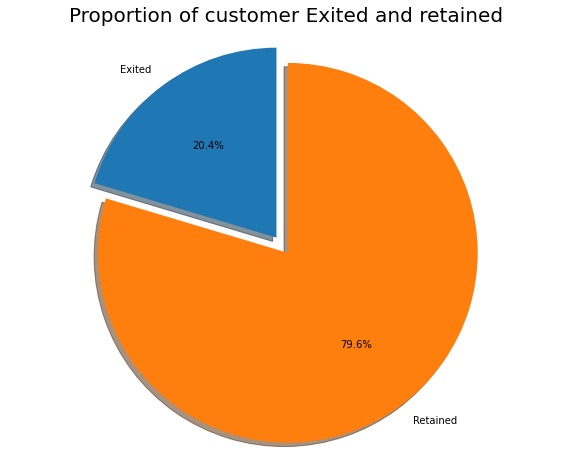

In [8]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer Exited and retained", size = 20)
plt.show()

<AxesSubplot:xlabel='Geography', ylabel='count'>

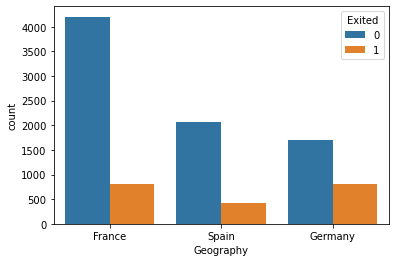

In [9]:
sns.countplot(x='Geography', hue = 'Exited',data = df)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

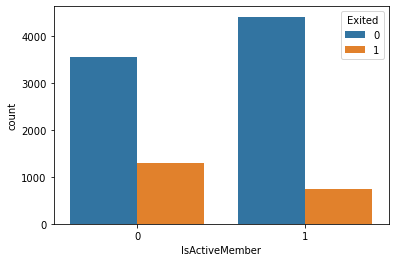

In [10]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

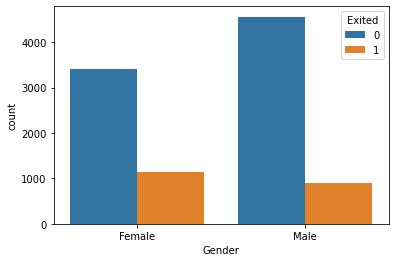

In [11]:
sns.countplot(x='Gender', hue = 'Exited',data = df)

In [12]:
df2 = df.drop(["Exited", "HasCrCard", "IsActiveMember"], axis = 1) # to create box plot only

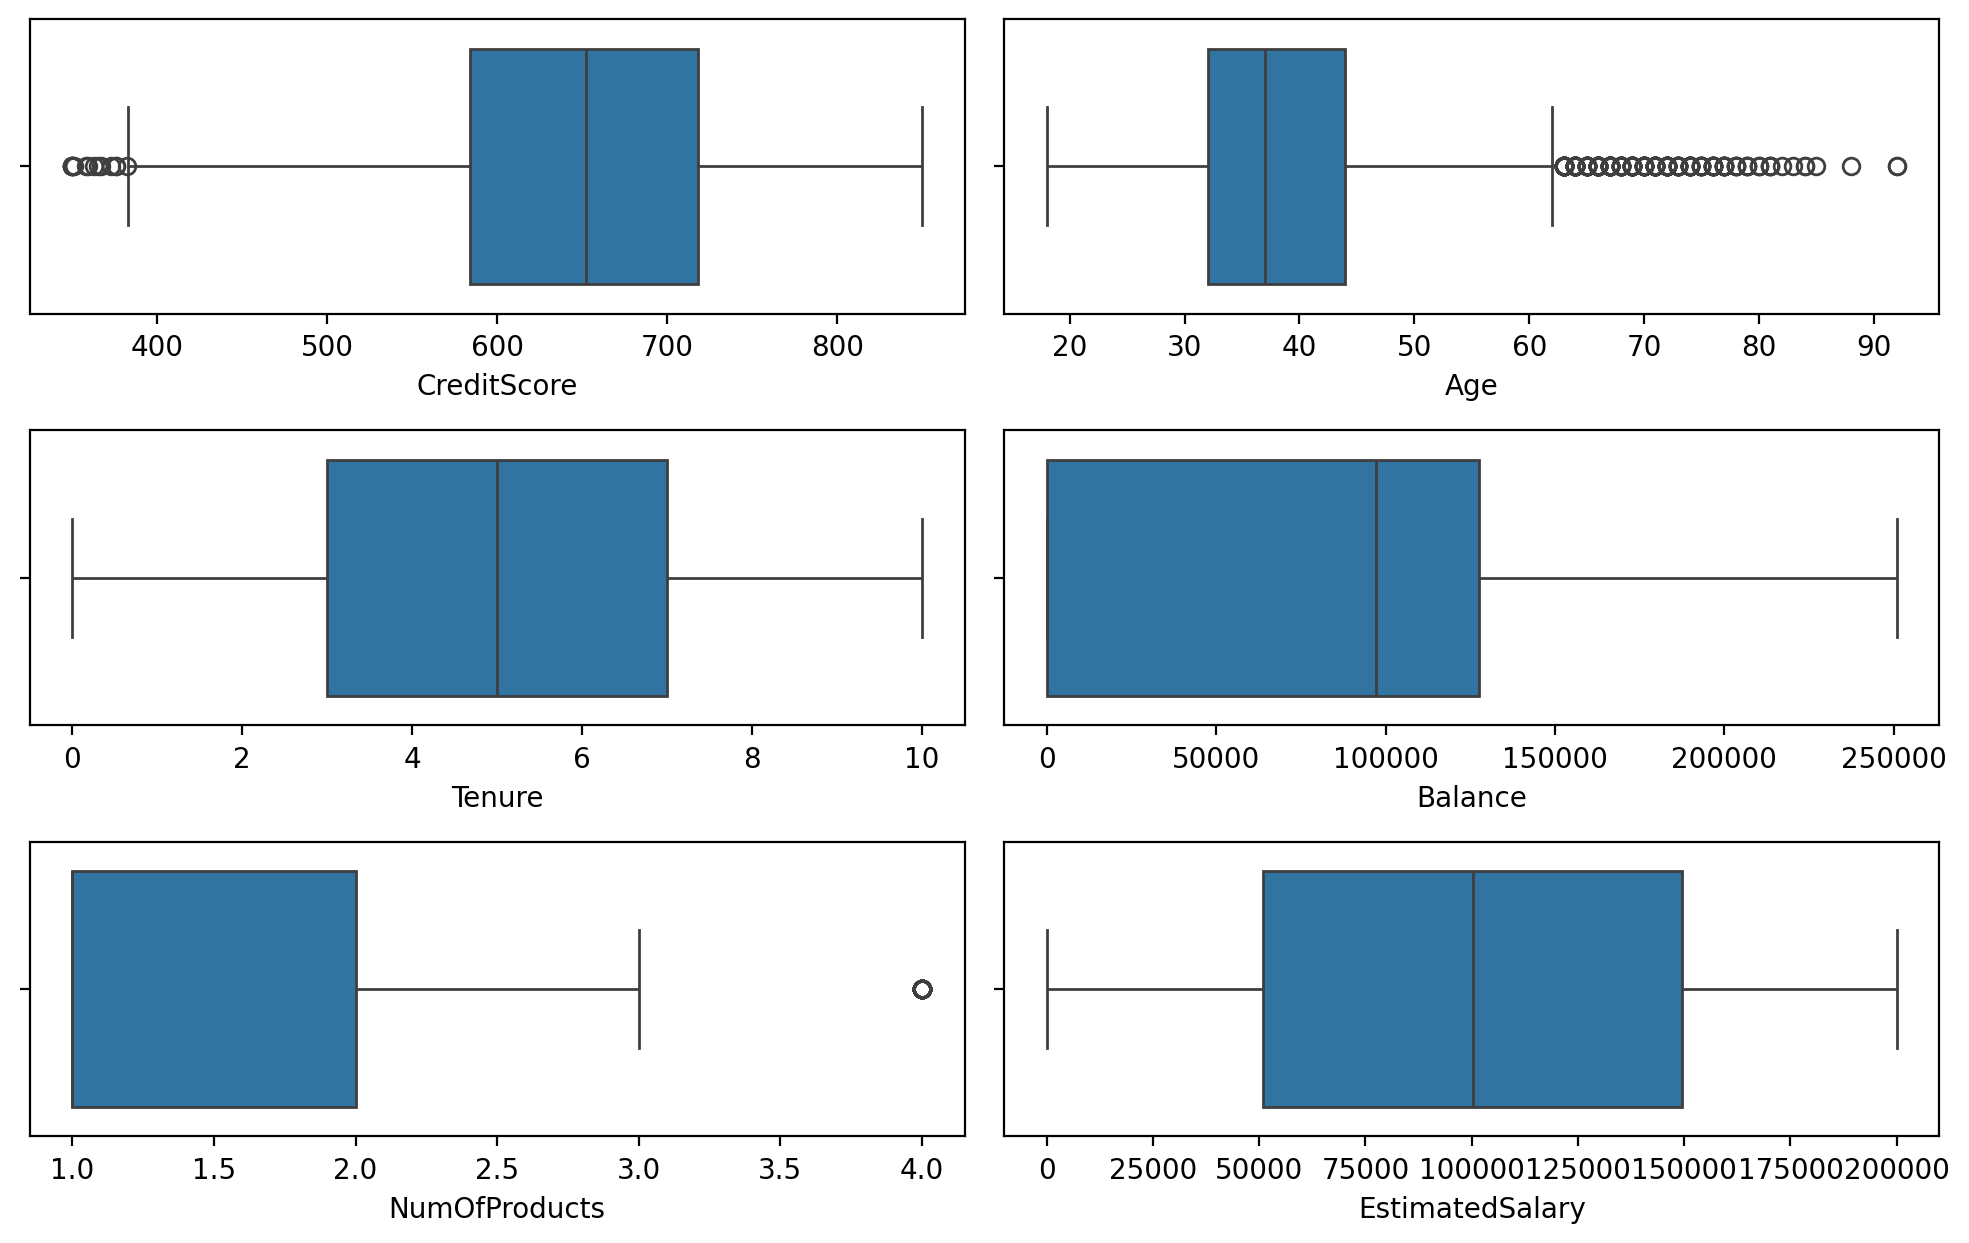

In [13]:
fig = plt.figure(figsize=(10,10), dpi=200)

for i, col in enumerate(df2.select_dtypes(include=np.number)):
        plt.subplot(5,2,i+1)
        ax = sns.boxplot(x=df[col])
        
plt.tight_layout(); # there is outliers in Age, creditScore and NumOfProducts

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
df = pd.get_dummies(data=df, dtype='int') #one-hot encoding
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [17]:
X= df.drop("Exited",axis=1)
y= df["Exited"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=42
)

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [22]:
X_train.shape

(8000, 13)

In [23]:
X_test.shape

(2000, 13)

In [24]:
model = Sequential()

model.add(Dense(7, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(7, activation="relu"))
model.add(Dense(7, activation="relu"))
model.add(Dense(7, activation="relu"))
model.add(Dense(7, activation="relu"))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
model.fit(
    x=X_train, y=y_train, validation_split=0.15, batch_size=32, epochs=100, verbose=1
)

Epoch 1/100
213/213 [==============================] - 3s 5ms/step - loss: 0.5463 - accuracy: 0.7944 - val_loss: 0.4766 - val_accuracy: 0.8067
Epoch 2/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4735 - accuracy: 0.7944 - val_loss: 0.4479 - val_accuracy: 0.8067
Epoch 3/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4487 - accuracy: 0.7944 - val_loss: 0.4319 - val_accuracy: 0.8067
Epoch 4/100
213/213 [==============================] - 1s 4ms/step - loss: 0.4349 - accuracy: 0.7944 - val_loss: 0.4212 - val_accuracy: 0.8067
Epoch 5/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4229 - accuracy: 0.7944 - val_loss: 0.4079 - val_accuracy: 0.8067
Epoch 6/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4112 - accuracy: 0.8038 - val_loss: 0.3971 - val_accuracy: 0.8242
Epoch 7/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4006 - accuracy: 0.8257 - val_loss: 0.3868 - val_accuracy: 0.8450

Epoch 58/100
213/213 [==============================] - 1s 3ms/step - loss: 0.3394 - accuracy: 0.8629 - val_loss: 0.3271 - val_accuracy: 0.8675
Epoch 59/100
213/213 [==============================] - 2s 8ms/step - loss: 0.3384 - accuracy: 0.8632 - val_loss: 0.3240 - val_accuracy: 0.8733
Epoch 60/100
213/213 [==============================] - 3s 13ms/step - loss: 0.3383 - accuracy: 0.8635 - val_loss: 0.3249 - val_accuracy: 0.8692
Epoch 61/100
213/213 [==============================] - 2s 8ms/step - loss: 0.3385 - accuracy: 0.8641 - val_loss: 0.3278 - val_accuracy: 0.8708
Epoch 62/100
213/213 [==============================] - 1s 5ms/step - loss: 0.3397 - accuracy: 0.8637 - val_loss: 0.3244 - val_accuracy: 0.8742
Epoch 63/100
213/213 [==============================] - 1s 4ms/step - loss: 0.3381 - accuracy: 0.8625 - val_loss: 0.3310 - val_accuracy: 0.8675
Epoch 64/100
213/213 [==============================] - 1s 4ms/step - loss: 0.3378 - accuracy: 0.8649 - val_loss: 0.3246 - val_accuracy

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 98        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 1)                 8

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [27]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.546302,0.794412,0.476631,0.806667
1,0.473529,0.794412,0.447936,0.806667
2,0.448720,0.794412,0.431921,0.806667
3,0.434857,0.794412,0.421240,0.806667
4,0.422924,0.794412,0.407864,0.806667


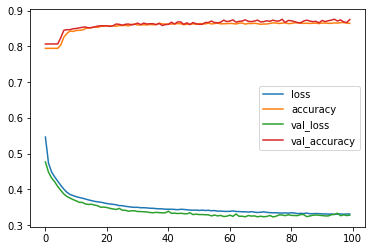

In [28]:
loss_df.plot()
plt.show()

In [29]:
model.evaluate(X_test, y_test, verbose=0)

[0.3454541563987732, 0.8629999756813049]

In [30]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3454541563987732
accuracy:  0.8629999756813049


In [31]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1528   65]
 [ 209  198]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.49      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



63/63 [==============================] - 0s 2ms/step


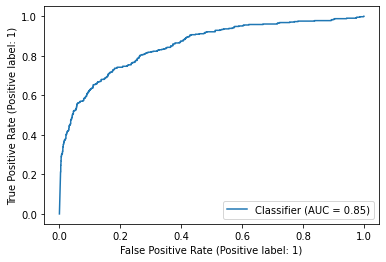

In [32]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [33]:
from sklearn.utils import class_weight

In [34]:
model_cw = Sequential()

model_cw.add(Dense(7, activation="relu", input_dim=X_train.shape[1]))
model_cw.add(Dense(7, activation="relu"))
model_cw.add(Dense(7, activation="relu"))
model_cw.add(Dense(7, activation="relu"))
model_cw.add(Dense(7, activation="relu"))
model_cw.add(Dense(7, activation="relu"))
model_cw.add(Dense(1, activation="sigmoid"))

model_cw.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [35]:
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [36]:
model_cw.fit(
    x=X_train, y=y_train, validation_split=0.15, batch_size=32, class_weight=class_weights, epochs=100, verbose=1
)

Epoch 1/100
213/213 [==============================] - 3s 8ms/step - loss: 0.6769 - accuracy: 0.4121 - val_loss: 0.7122 - val_accuracy: 0.6033
Epoch 2/100
213/213 [==============================] - 1s 4ms/step - loss: 0.6069 - accuracy: 0.6810 - val_loss: 0.6445 - val_accuracy: 0.6733
Epoch 3/100
213/213 [==============================] - 1s 4ms/step - loss: 0.5705 - accuracy: 0.7132 - val_loss: 0.5533 - val_accuracy: 0.7325
Epoch 4/100
213/213 [==============================] - 1s 5ms/step - loss: 0.5492 - accuracy: 0.7288 - val_loss: 0.5672 - val_accuracy: 0.7100
Epoch 5/100
213/213 [==============================] - 1s 4ms/step - loss: 0.5341 - accuracy: 0.7375 - val_loss: 0.5424 - val_accuracy: 0.7250
Epoch 6/100
213/213 [==============================] - 1s 4ms/step - loss: 0.5216 - accuracy: 0.7418 - val_loss: 0.5430 - val_accuracy: 0.7208
Epoch 7/100
213/213 [==============================] - 2s 8ms/step - loss: 0.5068 - accuracy: 0.7496 - val_loss: 0.4713 - val_accuracy: 0.7750

Epoch 58/100
213/213 [==============================] - 1s 5ms/step - loss: 0.4498 - accuracy: 0.7962 - val_loss: 0.4525 - val_accuracy: 0.7850
Epoch 59/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4499 - accuracy: 0.7959 - val_loss: 0.4668 - val_accuracy: 0.7808
Epoch 60/100
213/213 [==============================] - 1s 5ms/step - loss: 0.4493 - accuracy: 0.7971 - val_loss: 0.4379 - val_accuracy: 0.8008
Epoch 61/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4501 - accuracy: 0.7966 - val_loss: 0.4574 - val_accuracy: 0.7875
Epoch 62/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4505 - accuracy: 0.7971 - val_loss: 0.4535 - val_accuracy: 0.7833
Epoch 63/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4492 - accuracy: 0.7990 - val_loss: 0.4493 - val_accuracy: 0.7883
Epoch 64/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4486 - accuracy: 0.7960 - val_loss: 0.4368 - val_accuracy:

In [37]:
model_cw.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 7)                 98        
                                                                 
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 7)                 56        
                                                                 
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 1)                

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [38]:
loss_df = pd.DataFrame(model_cw.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.676921,0.412059,0.712188,0.603333
1,0.606947,0.681029,0.644523,0.673333
2,0.570463,0.713235,0.553339,0.732500
3,0.549203,0.728824,0.567231,0.710000
4,0.534113,0.737500,0.542441,0.725000


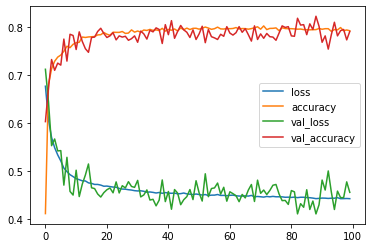

In [39]:
loss_df.plot()
plt.show()

In [40]:
model_cw.evaluate(X_test, y_test, verbose=0)

[0.4625414311885834, 0.7720000147819519]

In [41]:
loss, accuracy = model_cw.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4625414311885834
accuracy:  0.7720000147819519


In [42]:
y_pred = model_cw.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1237  356]
 [ 100  307]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.84      1593
           1       0.46      0.75      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



63/63 [==============================] - 0s 2ms/step


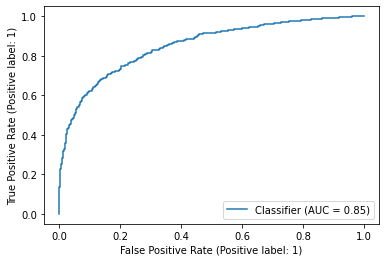

In [43]:
y_pred_proba = model_cw.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [44]:
from tensorflow.keras.optimizers import Adam

In [45]:
model_lr = Sequential()

model_lr.add(Dense(7, activation="relu", input_dim=X_train.shape[1]))
model_lr.add(Dense(7, activation="relu"))
model_lr.add(Dense(7, activation="relu"))
model_lr.add(Dense(7, activation="relu"))
model_lr.add(Dense(7, activation="relu"))
model_lr.add(Dense(7, activation="relu"))
model_lr.add(Dense(1, activation="sigmoid"))

opt= opt = Adam(learning_rate=0.005)

model_lr.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [46]:
model_lr.fit(
    x=X_train, y=y_train, validation_split=0.15, batch_size=32, class_weight=class_weights, epochs=100, verbose=1
)

Epoch 1/100
213/213 [==============================] - 3s 4ms/step - loss: 0.6313 - accuracy: 0.6071 - val_loss: 0.6765 - val_accuracy: 0.6792
Epoch 2/100
213/213 [==============================] - 1s 3ms/step - loss: 0.5321 - accuracy: 0.7629 - val_loss: 0.5001 - val_accuracy: 0.7975
Epoch 3/100
213/213 [==============================] - 1s 4ms/step - loss: 0.5082 - accuracy: 0.7754 - val_loss: 0.4777 - val_accuracy: 0.7992
Epoch 4/100
213/213 [==============================] - 1s 5ms/step - loss: 0.4980 - accuracy: 0.7738 - val_loss: 0.4443 - val_accuracy: 0.8208
Epoch 5/100
213/213 [==============================] - 1s 5ms/step - loss: 0.4934 - accuracy: 0.7806 - val_loss: 0.4923 - val_accuracy: 0.7675
Epoch 6/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4894 - accuracy: 0.7774 - val_loss: 0.4574 - val_accuracy: 0.7917
Epoch 7/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4900 - accuracy: 0.7797 - val_loss: 0.4502 - val_accuracy: 0.8050

Epoch 58/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4578 - accuracy: 0.7918 - val_loss: 0.4700 - val_accuracy: 0.7808
Epoch 59/100
213/213 [==============================] - 1s 4ms/step - loss: 0.4559 - accuracy: 0.7901 - val_loss: 0.4522 - val_accuracy: 0.7817
Epoch 60/100
213/213 [==============================] - 1s 5ms/step - loss: 0.4579 - accuracy: 0.7832 - val_loss: 0.4104 - val_accuracy: 0.8017
Epoch 61/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4569 - accuracy: 0.7875 - val_loss: 0.4731 - val_accuracy: 0.7633
Epoch 62/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4587 - accuracy: 0.7844 - val_loss: 0.4518 - val_accuracy: 0.7825
Epoch 63/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4566 - accuracy: 0.7844 - val_loss: 0.5097 - val_accuracy: 0.7467
Epoch 64/100
213/213 [==============================] - 1s 4ms/step - loss: 0.4566 - accuracy: 0.7832 - val_loss: 0.4307 - val_accuracy:

In [47]:
loss_df = pd.DataFrame(model_lr.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.631280,0.607059,0.676469,0.679167
1,0.532078,0.762941,0.500113,0.797500
2,0.508207,0.775441,0.477705,0.799167
3,0.498013,0.773823,0.444288,0.820833
4,0.493358,0.780588,0.492339,0.767500


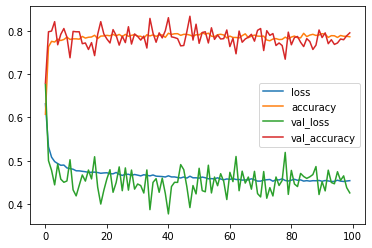

In [48]:
loss_df.plot()
plt.show()

In [49]:
model_lr.evaluate(X_test, y_test, verbose=0)

[0.4469735026359558, 0.781499981880188]

In [50]:
loss, accuracy = model_lr.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4469735026359558
accuracy:  0.781499981880188


In [51]:
y_pred = model_lr.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 1s 4ms/step
[[1260  333]
 [ 104  303]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.48      0.74      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



63/63 [==============================] - 0s 3ms/step


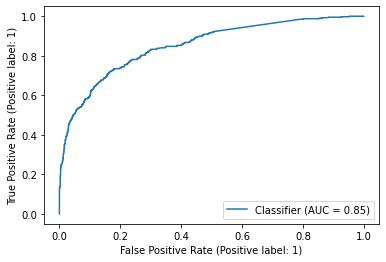

In [52]:
y_pred_proba = model_lr.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

### Add Dropout Layer

In [53]:
from tensorflow.keras.layers import Dropout

In [54]:
model_dl = Sequential()

model_dl.add(Dense(7, activation="relu", input_dim=X_train.shape[1]))
model_dl.add(Dropout(0.2))
model_dl.add(Dense(7, activation="relu"))
model_dl.add(Dropout(0.2))
model_dl.add(Dense(7, activation="relu"))
model_dl.add(Dropout(0.2))
model_dl.add(Dense(7, activation="relu"))
model_dl.add(Dropout(0.2))
model_dl.add(Dense(7, activation="relu"))
model_dl.add(Dropout(0.2))
model_dl.add(Dense(7, activation="relu"))
model_dl.add(Dropout(0.2))
model_dl.add(Dense(1, activation="sigmoid"))

opt= opt = Adam(learning_rate=0.005)

model_dl.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [55]:
model_dl.fit(
    x=X_train, y=y_train, validation_split=0.15, batch_size=32, class_weight=class_weights, epochs=100, verbose=1
)

Epoch 1/100
213/213 [==============================] - 3s 5ms/step - loss: 0.6844 - accuracy: 0.5088 - val_loss: 0.7315 - val_accuracy: 0.3233
Epoch 2/100
213/213 [==============================] - 1s 4ms/step - loss: 0.6520 - accuracy: 0.5206 - val_loss: 0.5918 - val_accuracy: 0.6592
Epoch 3/100
213/213 [==============================] - 1s 7ms/step - loss: 0.6305 - accuracy: 0.6335 - val_loss: 0.5755 - val_accuracy: 0.6992
Epoch 4/100
213/213 [==============================] - 1s 4ms/step - loss: 0.6171 - accuracy: 0.6662 - val_loss: 0.5953 - val_accuracy: 0.6917
Epoch 5/100
213/213 [==============================] - 1s 4ms/step - loss: 0.6102 - accuracy: 0.6966 - val_loss: 0.5559 - val_accuracy: 0.7167
Epoch 6/100
213/213 [==============================] - 1s 4ms/step - loss: 0.6057 - accuracy: 0.6681 - val_loss: 0.5592 - val_accuracy: 0.7033
Epoch 7/100
213/213 [==============================] - 1s 4ms/step - loss: 0.5935 - accuracy: 0.7074 - val_loss: 0.5867 - val_accuracy: 0.7258

Epoch 58/100
213/213 [==============================] - 2s 8ms/step - loss: 0.5472 - accuracy: 0.7425 - val_loss: 0.5570 - val_accuracy: 0.7375
Epoch 59/100
213/213 [==============================] - 1s 7ms/step - loss: 0.5558 - accuracy: 0.7275 - val_loss: 0.4514 - val_accuracy: 0.7967
Epoch 60/100
213/213 [==============================] - 1s 6ms/step - loss: 0.5422 - accuracy: 0.7365 - val_loss: 0.5219 - val_accuracy: 0.7508
Epoch 61/100
213/213 [==============================] - 2s 9ms/step - loss: 0.5552 - accuracy: 0.7326 - val_loss: 0.5227 - val_accuracy: 0.7550
Epoch 62/100
213/213 [==============================] - 2s 11ms/step - loss: 0.5597 - accuracy: 0.7184 - val_loss: 0.5063 - val_accuracy: 0.7642
Epoch 63/100
213/213 [==============================] - 1s 7ms/step - loss: 0.5434 - accuracy: 0.7475 - val_loss: 0.5233 - val_accuracy: 0.7883
Epoch 64/100
213/213 [==============================] - 2s 11ms/step - loss: 0.5447 - accuracy: 0.7194 - val_loss: 0.4665 - val_accurac

In [56]:
loss_df = pd.DataFrame(model_dl.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.684415,0.508824,0.731451,0.323333
1,0.651972,0.520588,0.591826,0.659167
2,0.630481,0.633529,0.575462,0.699167
3,0.617087,0.666176,0.595273,0.691667
4,0.610206,0.696618,0.555875,0.716667


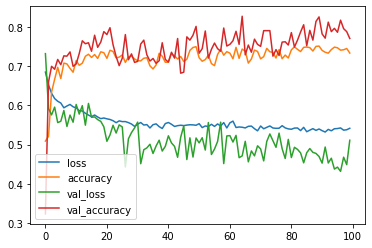

In [57]:
loss_df.plot()
plt.show()

In [58]:
model_dl.evaluate(X_test, y_test, verbose=0)

[0.5261231660842896, 0.75]

In [59]:
loss, accuracy = model_dl.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.5261231660842896
accuracy:  0.75


In [60]:
y_pred = model_dl.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 1s 5ms/step
[[1172  421]
 [  79  328]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.82      1593
           1       0.44      0.81      0.57       407

    accuracy                           0.75      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.75      0.77      2000



63/63 [==============================] - 0s 4ms/step


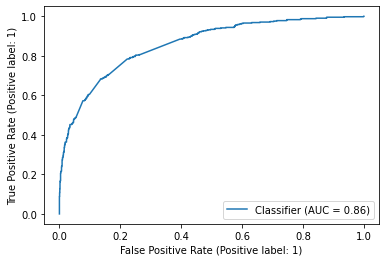

In [61]:
y_pred_proba = model_dl.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
model_es = Sequential()

model_es.add(Dense(7, activation="relu", input_dim=X_train.shape[1]))
model_es.add(Dropout(0.2))
model_es.add(Dense(7, activation="relu"))
model_es.add(Dropout(0.2))
model_es.add(Dense(7, activation="relu"))
model_es.add(Dropout(0.2))
model_es.add(Dense(7, activation="relu"))
model_es.add(Dropout(0.2))
model_es.add(Dense(7, activation="relu"))
model_es.add(Dropout(0.2))
model_es.add(Dense(7, activation="relu"))
model_es.add(Dropout(0.2))
model_es.add(Dense(1, activation="sigmoid"))

opt= opt = Adam(learning_rate=0.005)

model_es.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [64]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [65]:
model_es.fit(
    x=X_train, y=y_train, validation_split=0.15, batch_size=32, class_weight=class_weights, epochs=100, verbose=1, 
    callbacks=[early_stop])

Epoch 1/100
213/213 [==============================] - 7s 9ms/step - loss: 0.6959 - accuracy: 0.4432 - val_loss: 0.7012 - val_accuracy: 0.4933
Epoch 2/100
213/213 [==============================] - 2s 10ms/step - loss: 0.6716 - accuracy: 0.6187 - val_loss: 0.6145 - val_accuracy: 0.7317
Epoch 3/100
213/213 [==============================] - 2s 9ms/step - loss: 0.6091 - accuracy: 0.7304 - val_loss: 0.5535 - val_accuracy: 0.7842
Epoch 4/100
213/213 [==============================] - 1s 7ms/step - loss: 0.5999 - accuracy: 0.7481 - val_loss: 0.5978 - val_accuracy: 0.6900
Epoch 5/100
213/213 [==============================] - 2s 9ms/step - loss: 0.5833 - accuracy: 0.7494 - val_loss: 0.5405 - val_accuracy: 0.7200
Epoch 6/100
213/213 [==============================] - 2s 10ms/step - loss: 0.5758 - accuracy: 0.7471 - val_loss: 0.5556 - val_accuracy: 0.7192
Epoch 7/100
213/213 [==============================] - 2s 8ms/step - loss: 0.5898 - accuracy: 0.7318 - val_loss: 0.5079 - val_accuracy: 0.73

In [66]:
loss_df = pd.DataFrame(model_es.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.695903,0.443235,0.701245,0.493333
1,0.671605,0.618676,0.614501,0.731667
2,0.609130,0.730441,0.553523,0.784167
3,0.599936,0.748088,0.597763,0.690000
4,0.583289,0.749412,0.540504,0.720000


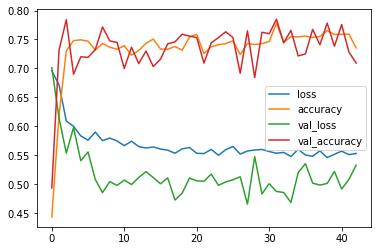

In [67]:
loss_df.plot()
plt.show()

In [68]:
model_es.evaluate(X_test, y_test, verbose=0)

[0.4666596055030823, 0.7605000138282776]

In [69]:
loss, accuracy = model_es.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4666596055030823
accuracy:  0.7605000138282776


In [70]:
y_pred = model_es.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 1s 6ms/step
[[1206  387]
 [  92  315]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1593
           1       0.45      0.77      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000



63/63 [==============================] - 0s 4ms/step


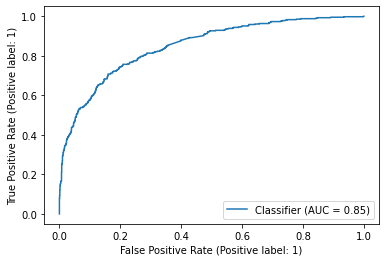

In [71]:
y_pred_proba = model_es.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

#### Monitor the "val_recall" as metric

In [72]:
model_esr = Sequential()

model_esr.add(Dense(7, activation="relu", input_dim=X_train.shape[1]))
model_esr.add(Dropout(0.2))
model_esr.add(Dense(7, activation="relu"))
model_esr.add(Dropout(0.2))
model_esr.add(Dense(7, activation="relu"))
model_esr.add(Dropout(0.2))
model_esr.add(Dense(7, activation="relu"))
model_esr.add(Dropout(0.2))
model_esr.add(Dense(7, activation="relu"))
model_esr.add(Dropout(0.2))
model_esr.add(Dense(7, activation="relu"))
model_esr.add(Dropout(0.2))
model_esr.add(Dense(1, activation="sigmoid"))

opt= opt = Adam(learning_rate=0.005)

model_esr.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [73]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [74]:
model_esr.fit(
    x=X_train, y=y_train, validation_split=0.15, batch_size=32, class_weight=class_weights, epochs=100, verbose=1, 
    callbacks=[early_stop])

Epoch 1/100
213/213 [==============================] - 9s 14ms/step - loss: 0.6935 - recall: 0.7840 - val_loss: 0.6714 - val_recall: 0.8147
Epoch 2/100
213/213 [==============================] - 1s 6ms/step - loss: 0.6600 - recall: 0.7876 - val_loss: 0.6188 - val_recall: 0.7931
Epoch 3/100
213/213 [==============================] - 2s 8ms/step - loss: 0.6459 - recall: 0.8062 - val_loss: 0.5964 - val_recall: 0.7500
Epoch 4/100
213/213 [==============================] - 2s 9ms/step - loss: 0.6342 - recall: 0.7768 - val_loss: 0.6675 - val_recall: 0.7845
Epoch 5/100
213/213 [==============================] - 3s 13ms/step - loss: 0.6109 - recall: 0.7196 - val_loss: 0.6187 - val_recall: 0.7414
Epoch 6/100
213/213 [==============================] - 2s 8ms/step - loss: 0.6079 - recall: 0.6960 - val_loss: 0.6064 - val_recall: 0.7802
Epoch 7/100
213/213 [==============================] - 2s 7ms/step - loss: 0.5952 - recall: 0.7003 - val_loss: 0.5733 - val_recall: 0.7802
Epoch 8/100
213/213 [====

In [75]:
loss_df = pd.DataFrame(model_esr.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.693451,0.783977,0.671442,0.814655
1,0.659970,0.787554,0.618794,0.793103
2,0.645902,0.806152,0.596447,0.750000
3,0.634211,0.776824,0.667455,0.784483
4,0.610859,0.719599,0.618675,0.741379


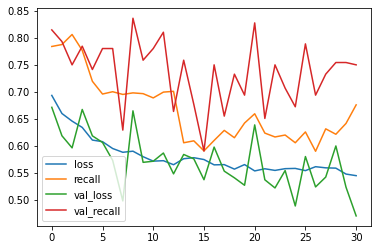

In [76]:
loss_df.plot()
plt.show()

In [77]:
model_esr.evaluate(X_test, y_test, verbose=0)

[0.5377788543701172, 0.6093366146087646]

In [78]:
loss, recall = model_esr.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5377788543701172
recall:  0.6093366146087646


In [79]:
y_pred = model_esr.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1437  156]
 [ 159  248]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.61      0.61       407

    accuracy                           0.84      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000



63/63 [==============================] - 0s 2ms/step


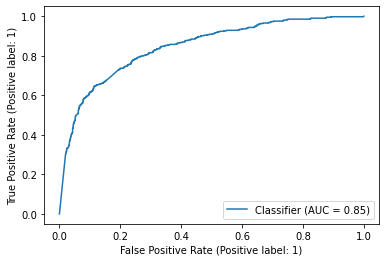

In [80]:
y_pred_proba = model_esr.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

## Optuna

In [81]:
!pip install optuna

In [82]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [83]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [84]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model_op = Sequential()
    model_op.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model_op.add(Dense(n_units2, activation="relu"))
    model_op.add(Dense(1, activation="sigmoid"))
    model_op.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model_op


def objective(trial):
    model_op = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model_op.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model_op.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [85]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 13:40:19,529] A new study created in memory with name: no-name-ef717392-0548-4fad-a3e9-0e850304e485


Restoring model weights from the end of the best epoch: 28.
Epoch 43: early stopping


[I 2023-10-30 13:40:44,346] Trial 0 finished with value: 0.8259999752044678 and parameters: {'n_units1': 112, 'n_units2': 96, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00018414894213404217, 'w0': 0.08898342444316795, 'w1': 0.01121756288455471}. Best is trial 0 with value: 0.8259999752044678.


Restoring model weights from the end of the best epoch: 21.
Epoch 36: early stopping


[I 2023-10-30 13:41:15,868] Trial 1 finished with value: 0.8180000185966492 and parameters: {'n_units1': 33, 'n_units2': 45, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.04678783023238464, 'w0': 0.9020661713426913, 'w1': 0.024669882480508977}. Best is trial 0 with value: 0.8259999752044678.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 13:41:29,591] Trial 2 finished with value: 0.796500027179718 and parameters: {'n_units1': 80, 'n_units2': 54, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 5.6225053708308706e-05, 'w0': 0.23854892372249523, 'w1': 0.036430665052443655}. Best is trial 0 with value: 0.8259999752044678.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 13:41:50,653] Trial 3 finished with value: 0.859000027179718 and parameters: {'n_units1': 73, 'n_units2': 68, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.007253433691614336, 'w0': 0.10553400215256968, 'w1': 0.05753595066708376}. Best is trial 3 with value: 0.859000027179718.


Restoring model weights from the end of the best epoch: 29.
Epoch 44: early stopping


[I 2023-10-30 13:42:23,413] Trial 4 finished with value: 0.796500027179718 and parameters: {'n_units1': 14, 'n_units2': 8, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.5928360063910735e-05, 'w0': 0.07444455412133863, 'w1': 0.012109892553110624}. Best is trial 3 with value: 0.859000027179718.


Restoring model weights from the end of the best epoch: 17.
Epoch 32: early stopping


[I 2023-10-30 13:43:07,330] Trial 5 finished with value: 0.8514999747276306 and parameters: {'n_units1': 21, 'n_units2': 72, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.004381551554948478, 'w0': 0.46957671847420546, 'w1': 0.12458335508502152}. Best is trial 3 with value: 0.859000027179718.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 13:43:24,828] Trial 6 finished with value: 0.3125 and parameters: {'n_units1': 21, 'n_units2': 29, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 2.201771993666597e-05, 'w0': 0.01102061747641542, 'w1': 1.9861822725062135}. Best is trial 3 with value: 0.859000027179718.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 13:43:40,495] Trial 7 finished with value: 0.28850001096725464 and parameters: {'n_units1': 121, 'n_units2': 41, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.028107614973875733, 'w0': 0.01598234191192184, 'w1': 0.9557699043012945}. Best is trial 3 with value: 0.859000027179718.


Restoring model weights from the end of the best epoch: 17.
Epoch 32: early stopping


[I 2023-10-30 13:44:26,024] Trial 8 finished with value: 0.6209999918937683 and parameters: {'n_units1': 93, 'n_units2': 18, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.06084743756500581, 'w0': 0.202369014651232, 'w1': 3.377566842978971}. Best is trial 3 with value: 0.859000027179718.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-10-30 13:44:39,295] Trial 9 finished with value: 0.7944999933242798 and parameters: {'n_units1': 84, 'n_units2': 40, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00860710824116337, 'w0': 3.184210447937782, 'w1': 0.028127431862126757}. Best is trial 3 with value: 0.859000027179718.


{'n_units1': 73,
 'n_units2': 68,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.007253433691614336,
 'w0': 0.10553400215256968,
 'w1': 0.05753595066708376}

In [86]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model_op = Sequential()
model_op.add(Dense(unit1, activation="relu"))
model_op.add(Dense(unit2, activation="relu"))
model_op.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model_op.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

# train model
model_op.fit(
    X_train,
    y_train,
    validation_split=0.15,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
14/14 [==============================] - 2s 33ms/step - loss: 0.5509 - accuracy: 0.7418 - val_loss: 0.4359 - val_accuracy: 0.8192
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 0.4374 - accuracy: 0.8068 - val_loss: 0.4139 - val_accuracy: 0.8308
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 0.4163 - accuracy: 0.8182 - val_loss: 0.4026 - val_accuracy: 0.8483
Epoch 4/100
14/14 [==============================] - 0s 12ms/step - loss: 0.3991 - accuracy: 0.8325 - val_loss: 0.3724 - val_accuracy: 0.8508
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 0.3756 - accuracy: 0.8428 - val_loss: 0.3470 - val_accuracy: 0.8608
Epoch 6/100
14/14 [==============================] - 0s 12ms/step - loss: 0.3567 - accuracy: 0.8531 - val_loss: 0.3300 - val_accuracy: 0.8633
Epoch 7/100
14/14 [==============================] - 0s 12ms/step - loss: 0.3473 - accuracy: 0.8571 - val_loss: 0.3201 - val_accuracy: 0.8692
Epoch 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [87]:
history = model_op.history.history

In [88]:
loss_df = pd.DataFrame(model_op.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.550888,0.741765,0.435867,0.819167
1,0.437385,0.806765,0.413869,0.830833
2,0.416342,0.818235,0.402603,0.848333
3,0.399123,0.832500,0.372374,0.850833
4,0.375559,0.842794,0.346954,0.860833


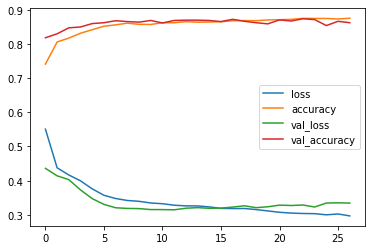

In [89]:
loss_df.plot()
plt.show()

In [90]:
model_op.evaluate(X_test, y_test, verbose=0)

[0.3355422616004944, 0.8659999966621399]

In [91]:
loss, accuracy = model_op.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3355422616004944
accuracy:  0.8659999966621399


In [92]:
y_pred = model_op.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 3ms/step
[[1538   55]
 [ 213  194]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.48      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



63/63 [==============================] - 0s 3ms/step


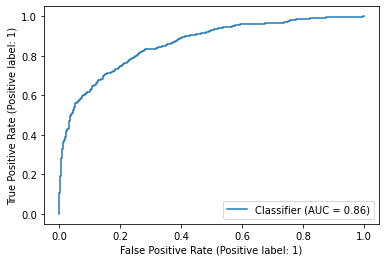

In [93]:
y_pred_proba = model_op.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

# Final Model and Model Deployment

In [94]:
from tensorflow.keras.models import load_model
import pickle

In [95]:
model_op.save("model_churned.h5") # i used model with optuna as a final model

In [96]:
pickle.dump(scaler, open("scaler_churned", "wb"))

In [97]:
model_churned = load_model("model_churned.h5")
scaler_churned = pickle.load(open("scaler_churned", "rb"))

## Prediction

In [98]:
single_customer = df.drop("Exited", axis=1).iloc[2:3, :]
single_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2,502,42,8,159660.8,3,1,0,113931.57,1,0,0,1,0


In [99]:
single_customer = scaler_churned.transform(single_customer)
single_customer

array([[-1.54003409,  0.29007331,  1.02995403,  1.33679057,  2.52791721,
         0.64104192, -1.030206  ,  0.24769542,  1.00175153, -0.57831252,
        -0.57773517,  1.10191942, -1.10191942]])

In [100]:
(model_churned.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 142ms/step


array([[1]])

In [101]:
df["Exited"].iloc[2]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___